<a href="https://colab.research.google.com/github/mohdrahil7/image-Segmentation/blob/master/FCNN_model_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from keras.models import Sequential
from keras.layers import *
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2

In [36]:
os.getcwd()

'/content/drive/My Drive'

In [37]:
os.listdir()

['Deep Learning Course 2020',
 'dataset',
 '0991313 A.pdf',
 'FIBONNAC.txt',
 'IMG_20160805_135345.jpg',
 'OS BOOKS.rar',
 'IMG1.DOC',
 'IMG1 (1).DOC.gdoc',
 'IMG1.DOC.gdoc',
 'IMG-20161021-WA0069.jpg',
 'PROJECT TOPIC.gslides',
 'SRS for digital library android application.docx.gdoc',
 'JNEC BOOK GANGA.gslides',
 'OnSocio (1).pptx',
 'IMG_20170920_095050.jpg',
 'IMG_20170920_095033.jpg',
 'IMG_20170920_095020.jpg',
 'IMG_20170920_094945.jpg',
 'IMG_20170920_094950.jpg',
 'Resume (13).gdoc',
 'Resume (12).gdoc',
 'Resume (11).gdoc',
 'Letter.gdoc',
 'Resume (10).gdoc',
 'Resume (9).gdoc',
 'Resume (8).gdoc',
 'BE-seminar Report format-22-08-17.doc',
 'Seminar PPT Format.ppt',
 'Seminar PPT Format.ppt.gslides',
 'Untitled presentation (2).gslides',
 'BE-seminar Report format-22-08-17.gdoc',
 'Bachelor Of Engineering In  Computer Science.gslides',
 'DEEP WEB.gdoc',
 'DEEP WEB.docx',
 'TABLE.gdoc',
 'OnSocio (1) (1).pptx.gslides',
 'SRS for digital library android application.gdoc',
 'Unt

In [0]:
os.chdir('/content/drive')

In [39]:
os.listdir()

['.shortcut-targets-by-id', 'My Drive', '.Trash']

In [0]:
os.chdir('My Drive')

In [41]:
os.listdir()

['Deep Learning Course 2020',
 'dataset',
 '0991313 A.pdf',
 'FIBONNAC.txt',
 'IMG_20160805_135345.jpg',
 'OS BOOKS.rar',
 'IMG1.DOC',
 'IMG1 (1).DOC.gdoc',
 'IMG1.DOC.gdoc',
 'IMG-20161021-WA0069.jpg',
 'PROJECT TOPIC.gslides',
 'SRS for digital library android application.docx.gdoc',
 'JNEC BOOK GANGA.gslides',
 'OnSocio (1).pptx',
 'IMG_20170920_095050.jpg',
 'IMG_20170920_095033.jpg',
 'IMG_20170920_095020.jpg',
 'IMG_20170920_094945.jpg',
 'IMG_20170920_094950.jpg',
 'Resume (13).gdoc',
 'Resume (12).gdoc',
 'Resume (11).gdoc',
 'Letter.gdoc',
 'Resume (10).gdoc',
 'Resume (9).gdoc',
 'Resume (8).gdoc',
 'BE-seminar Report format-22-08-17.doc',
 'Seminar PPT Format.ppt',
 'Seminar PPT Format.ppt.gslides',
 'Untitled presentation (2).gslides',
 'BE-seminar Report format-22-08-17.gdoc',
 'Bachelor Of Engineering In  Computer Science.gslides',
 'DEEP WEB.gdoc',
 'DEEP WEB.docx',
 'TABLE.gdoc',
 'OnSocio (1) (1).pptx.gslides',
 'SRS for digital library android application.gdoc',
 'Unt

In [0]:
os.chdir('dataset')

In [43]:
os.listdir()

['Skin_TestY.npy', 'Skin_ValidY.npy', 'Skin_ValidX.npy', 'Skin_TestX.npy']

In [0]:
#reading the training data 
#reading x and y data
x=np.load('Skin_TestX.npy')
y=np.load('Skin_TestY.npy')
#reading the test_data
x_test=np.load('Skin_ValidX.npy')
y_test=np.load('Skin_ValidY.npy')

In [45]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(600, 192, 256, 3)
(600, 192, 256)
(150, 192, 256, 3)
(150, 192, 256)


In [46]:
#preprocessing of data
#converting the data into first gray scale and then reducing dimensions
x_gray=[]
for i in range(0,len(x)):
    x_gray.append(cv2.cvtColor(x[i],cv2.COLOR_BGR2GRAY))
x=np.array(x_gray)
x_test_gray=[]
for i in range(0,len(x_test)):
    x_test_gray.append(cv2.cvtColor(x_test[i],cv2.COLOR_BGR2GRAY))
x_test=np.array(x_test_gray)

del x_gray
del x_test_gray

#resizing of the array into size of 128, 128 using cv2
x_resize=[]
for i in range(0,len(x)):
    x_resize.append(cv2.resize(x[i],(128,128)))
print(len(x_resize))
x_tresize=[]
for i in range(0,len(x_test)):
    x_tresize.append(cv2.resize(x_test[i],(128,128)))
print(len(x_tresize))

x=np.array(x_resize)
print(x.shape)
x_test=np.array(x_tresize)
print(x_test.shape)

#now converting each element into 3 dimension
x=x.reshape(-1,128,128,1)
print(x.shape)
x_test=x_test.reshape(-1,128,128,1)
print(x_test.shape)

600
150
(600, 128, 128)
(150, 128, 128)
(600, 128, 128, 1)
(150, 128, 128, 1)


In [47]:
#now performing the same operations for the y data
y_resize=[]
y_tresize=[]
for i in range(0,len(y)):
    y_resize.append(cv2.resize(y[i],(128,128)))
len(y_resize)
y=np.array(y_resize)
print(y.shape)
y=y.reshape(-1,128,128,1)
print(y.shape)

for i in range(0,len(y_test)):
    y_tresize.append(cv2.resize(y_test[i],(128,128)))
len(y_tresize)
y_test=np.array(y_tresize)
print(y_test.shape)
y_test=y_test.reshape(-1,128,128,1)
print(y_test.shape)

del y_resize
del y_tresize
del x_resize
del x_tresize

(600, 128, 128)
(600, 128, 128, 1)
(150, 128, 128)
(150, 128, 128, 1)


In [48]:
#finally after performing the all transformation
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(600, 128, 128, 1)
(600, 128, 128, 1)
(150, 128, 128, 1)
(150, 128, 128, 1)


In [0]:
#performing the normalization of taking each value between 0 and 1
x=x.astype('float32')/255
y=y.astype('float32')/255
x_test=x_test.astype('float32')/255
y_test=y_test.astype('float32')/255

In [0]:
#normalizing the training data
x_mean=np.mean(x)
x_std=np.std(x)
x=x-x_mean
x=x/x_std

In [0]:
#normalizing test data
x_test=x_test-x_mean
x_test=x_test/x_std

In [51]:
#creating a FCNN Model with constant kernel size results
model1 =Sequential()
model1.add(Conv2D(16, (3,3), activation='relu',   padding='same',input_shape=(128,128,1)))
model1.add(Conv2D(32, (3,3), activation='relu',   padding='same'))
model1.add(Conv2D(64, (3,3), activation='relu',   padding='same'))
model1.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model1.add(Dropout(0.5))
model1.add(Conv2D(1,  (1,1), activation='sigmoid',   padding='same'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 1)       129       
Total params: 97,281
Trainable params: 97,281
Non-trainable params: 0
__________________________________________________

In [0]:
model1.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [0]:
#moving into main directory
os.chdir('/content/drive/My Drive')

In [54]:
os.getcwd()

'/content/drive/My Drive'

In [0]:
#creating callbacks
#creating the callbacks and checkpoints to save best model
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor="val_loss",mode='min',patience=10 ,verbose=1)
cp=ModelCheckpoint('best_model_FCNN1.h5',monitor="val_loss",mode='min',verbose=1,save_best_only='true')

In [0]:
#fitting the model
history=model1.fit(x,y,batch_size=32,epochs=50,validation_split=0.2,callbacks=[es,cp],verbose=1,shuffle='true',class_weight='auto')

Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 123s 255ms/step - loss: 0.1673 - accuracy: 0.7487 - val_loss: 0.1695 - val_accuracy: 0.8113

Epoch 00001: val_loss improved from inf to 0.16950, saving model to best_model_FCNN1.h5
Epoch 2/50
480/480 [==============================] - 121s 252ms/step - loss: 0.1424 - accuracy: 0.8028 - val_loss: 0.1672 - val_accuracy: 0.7832

Epoch 00002: val_loss improved from 0.16950 to 0.16722, saving model to best_model_FCNN1.h5
Epoch 3/50
480/480 [==============================] - 121s 252ms/step - loss: 0.1351 - accuracy: 0.8139 - val_loss: 0.1421 - val_accuracy: 0.8359

Epoch 00003: val_loss improved from 0.16722 to 0.14212, saving model to best_model_FCNN1.h5
Epoch 4/50
480/480 [==============================] - 125s 261ms/step - loss: 0.1299 - accuracy: 0.8204 - val_loss: 0.1433 - val_accuracy: 0.8264

Epoch 00004: val_loss did not improve from 0.14212
Epoch 5/50
480/480 [=======================

In [0]:
model1.evaluate(x_test,y_test)

150/150 [==============================] - 9s 59ms/step


[0.1625791632135709, 0.8236612677574158]

In [0]:
#evaluting the best model
from keras.models import load_model
model_best=load_model('best_model_FCNN1.h5')
model_best.evaluate(x_test,y_test)

150/150 [==============================] - 9s 60ms/step


[0.1599790315826734, 0.8236629366874695]

In [0]:
#model with variable kernel size
model2 =Sequential()
model2.add(Conv2D(16, (3,3), activation='relu',   padding='same',input_shape=(128,128,1)))
model2.add(Conv2D(32, (5,5), activation='relu',   padding='same'))
model2.add(Conv2D(64, (7,7), activation='relu',   padding='same'))
model2.add(Dropout(0.5))
model2.add(Conv2D(1,  (1,1), activation='sigmoid',   padding='same'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)      100416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 1)       65        
Total params: 113,473
Trainable params: 113,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [0]:
#creating callbacks
#creating the callbacks and checkpoints to save best model
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor="val_loss",mode='min',patience=10 ,verbose=1)
cp=ModelCheckpoint('best_model_FCNN2.h5',monitor="val_loss",mode='min',verbose=1,save_best_only='true')

In [0]:
#fitting the model
history=model2.fit(x,y,batch_size=32,epochs=50,validation_split=0.2,callbacks=[es,cp],verbose=1,shuffle='true',class_weight='auto')

Train on 480 samples, validate on 120 samples
Epoch 1/50
192/480 [===========>..................] - ETA: 1:25 - loss: 0.2195 - accuracy: 0.6375

In [57]:
#use of upsampling layer this layer is used to perform nearest neighbour operation on the input image and it upsample the imge for example
model3 =Sequential()
model3.add(Conv2D(16, (3,3), activation='relu',   padding='same',input_shape=(128,128,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(32, (5,5), activation='relu',   padding='same'))
model3.add(Conv2D(64, (7,7), activation='relu',   padding='same'))
model3.add(UpSampling2D(size=(2,2)))
model3.add(Dropout(0.5))
model3.add(Conv2D(1,  (1,1), activation='sigmoid',   padding='same'))
model3.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        12832     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        100416    
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 1)      

In [0]:
model3.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [0]:
#creating callbacks
#creating the callbacks and checkpoints to save best model
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor="val_loss",mode='min',patience=10 ,verbose=1)
cp=ModelCheckpoint('best_model_Usample.h5',monitor="val_loss",mode='min',verbose=1,save_best_only='true')

In [60]:
#fitting the model
history=model3.fit(x,y,batch_size=32,epochs=50,validation_split=0.2,callbacks=[es,cp],verbose=1,shuffle='true',class_weight='auto')

Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 47s 97ms/step - loss: 0.1681 - accuracy: 0.7446 - val_loss: 0.1876 - val_accuracy: 0.7100

Epoch 00001: val_loss improved from inf to 0.18764, saving model to best_model_Usample.h5
Epoch 2/50
480/480 [==============================] - 46s 96ms/step - loss: 0.1409 - accuracy: 0.7851 - val_loss: 0.1582 - val_accuracy: 0.7900

Epoch 00002: val_loss improved from 0.18764 to 0.15819, saving model to best_model_Usample.h5
Epoch 3/50
480/480 [==============================] - 46s 97ms/step - loss: 0.1286 - accuracy: 0.8184 - val_loss: 0.1593 - val_accuracy: 0.7488

Epoch 00003: val_loss did not improve from 0.15819
Epoch 4/50
480/480 [==============================] - 46s 97ms/step - loss: 0.1174 - accuracy: 0.8315 - val_loss: 0.1377 - val_accuracy: 0.7977

Epoch 00004: val_loss improved from 0.15819 to 0.13773, saving model to best_model_Usample.h5
Epoch 5/50
480/480 [=========================

In [61]:
model3.evaluate(x_test,y_test)

150/150 [==============================] - 3s 21ms/step


[0.15860943019390106, 0.8237442970275879]

In [0]:
#prediction
predict=model3.predict(x_test[100].reshape(1,128,128,1))
predict=predict > 0.5

Text(0.5, 0, 'predicted image')

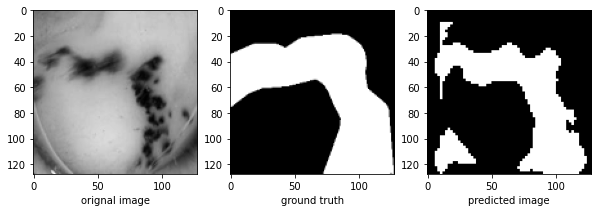

In [81]:
#plotting images
plt.figure(figsize=(10,10))
plt.subplot(131).imshow(x_test[100].reshape(128,128),'gray')
plt.xlabel('orignal image')
plt.subplot(132).imshow(y_test[100].reshape(128,128),'gray')
plt.xlabel('ground truth')
plt.subplot(133).imshow(predict.reshape(128,128),'gray')
plt.xlabel('predicted image')